In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('D:\Data Scientist Master Course\Data sci with python\Project Final\Comcast_telecom_complaints_data.csv')

In [3]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [4]:
print(df.isnull().sum())

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64


In [5]:
df.describe(include='all')

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
count,2224,2224,2224,2224,2224,2224,2224,2224,2224.000000,2224,2224
unique,2224,1841,91,91,2190,2,928,43,NaN,4,2
top,250635,Comcast,24-06-15,24-Jun-15,12:41:14 PM,Customer Care Call,Atlanta,Georgia,NaN,Solved,No
freq,1,83,218,218,2,1119,63,288,NaN,973,2021
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47994.393435,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28885.279427,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1075.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30056.500000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37211.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77058.750000,NaN,NaN


In [6]:
# Provide the trend chart for the number of complaints at monthly and daily granularity levels
df['Date_month_year']=df['Date_month_year'].apply(pd.to_datetime)
df=df.set_index('Date_month_year')

Text(0.5, 1.0, 'Montly Trend Chart')

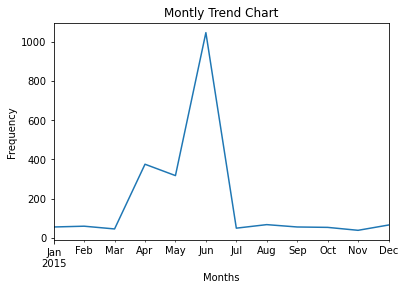

In [7]:
#plotting montly chart
months=df.groupby(pd.Grouper(freq='M')).size().plot()
plt.xlabel('Months')
plt.ylabel('Frequency')
plt.title('Montly Trend Chart')

# From Above chart the complaints for the month of june 2015 are maximum

In [8]:
df['Date'].value_counts(dropna=False)[:8]

24-06-15    218
23-06-15    190
25-06-15     98
26-06-15     55
30-06-15     53
29-06-15     51
18-06-15     47
06-12-15     43
Name: Date, dtype: int64

Text(0.5, 1.0, 'Daily Trend Chart')

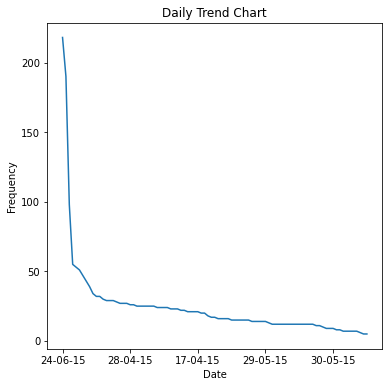

In [9]:
#plotting daily chart
df=df.sort_values(by='Date')
plt.figure(figsize=(6,6))
df['Date'].value_counts().plot()
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Daily Trend Chart')

# Provide a table with the frequency of complaint types.

In [10]:
df['Customer Complaint'].value_counts(dropna=False)[:9]

Comcast                     83
Comcast Internet            18
Comcast Data Cap            17
comcast                     13
Data Caps                   11
Comcast Billing             11
Comcast Data Caps           11
Unfair Billing Practices     9
Comcast data caps            8
Name: Customer Complaint, dtype: int64

<AxesSubplot:>

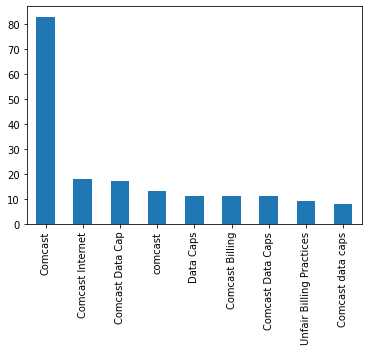

In [11]:
df['Customer Complaint'].value_counts(dropna=False)[:9].plot.bar()

# Which complaint types are maximum i.e., around internet, network issues, or across any other domains.

In [12]:
internet_issues1=df[df['Customer Complaint'].str.contains('network')].count()

In [13]:
internet_issues2=df[df['Customer Complaint'].str.contains('speed')].count()

In [14]:
internet_issues3=df[df['Customer Complaint'].str.contains('data')].count()

In [15]:
internet_issues4=df[df['Customer Complaint'].str.contains('internet')].count()

In [16]:
billing_issues1=df[df['Customer Complaint'].str.contains('bill')].count()

In [17]:
billing_issues2=df[df['Customer Complaint'].str.contains('billing')].count()

In [18]:
billing_issues3=df[df['Customer Complaint'].str.contains('charges')].count()

In [19]:
service_issues1=df[df['Customer Complaint'].str.contains('service')].count()

In [20]:
service_issues2=df[df['Customer Complaint'].str.contains('customer')].count()

In [21]:
total_internet_issues=internet_issues1+internet_issues2+internet_issues3+internet_issues4
print(total_internet_issues)

Ticket #                       374
Customer Complaint             374
Date                           374
Time                           374
Received Via                   374
City                           374
State                          374
Zip code                       374
Status                         374
Filing on Behalf of Someone    374
dtype: int64


In [22]:
total_billing_issues=billing_issues1+billing_issues2+billing_issues3
print(total_billing_issues)

Ticket #                       353
Customer Complaint             353
Date                           353
Time                           353
Received Via                   353
City                           353
State                          353
Zip code                       353
Status                         353
Filing on Behalf of Someone    353
dtype: int64


In [23]:
total_service_issues=service_issues1+service_issues2
print(total_service_issues)

Ticket #                       360
Customer Complaint             360
Date                           360
Time                           360
Received Via                   360
City                           360
State                          360
Zip code                       360
Status                         360
Filing on Behalf of Someone    360
dtype: int64


In [24]:
other_issues=2224-(total_internet_issues+total_billing_issues+total_service_issues)
print(other_issues)

Ticket #                       1137
Customer Complaint             1137
Date                           1137
Time                           1137
Received Via                   1137
City                           1137
State                          1137
Zip code                       1137
Status                         1137
Filing on Behalf of Someone    1137
dtype: int64


# Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed

In [25]:
df.Status.unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [26]:
df['newStatus']=['Open' if Status=='Open' or Status=='Pending' else 'Closed' for Status in df['Status']]
df=df.drop(['Status'],axis=1)
df

,Ticket #,Customer Complaint,Date,Time,Received Via,City,State,Zip code,Filing on Behalf of Someone,newStatus
Date_month_year,,,,,,,,,,
2015-01-04,211976,Fraudulent claims reported to collections agency,04-01-15,1:26:53 PM,Customer Care Call,Atlanta,Georgia,30312,No,Closed
2015-01-04,211677,Comcast refusal of service,04-01-15,12:01:06 PM,Customer Care Call,Wayne,Pennsylvania,19087,No,Closed
2015-01-04,212507,Comcast Cable,04-01-15,3:54:43 PM,Internet,Franklin,Tennessee,37067,No,Closed
2015-01-04,213120,Data Overages,04-01-15,8:05:57 PM,Internet,Savannah,Georgia,31406,No,Closed
2015-01-04,211478,Comcast,04-01-15,10:47:35 AM,Internet,North Huntingdon,Pennsylvania,15642,No,Closed
...,...,...,...,...,...,...,...,...,...,...
2015-05-31,316088,Comcast,31-05-15,11:02:38 PM,Customer Care Call,Beaverton,Oregon,97006,No,Open
2015-05-31,315759,Comcast of East Windsor NJ Complaint,31-05-15,3:25:33 PM,Internet,East Windsor,New Jersey,8520,No,Open
2015-05-31,316040,n/a (b) (6),31-05-15,9:25:28 PM,Internet,Loganville,Georgia,30052,No,Open


# Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from 

In [28]:
Status_complaints =df.groupby(['State','newStatus']).size().unstack()
print(Status_complaints)

newStatus             Closed  Open
State                             
Alabama                 17.0   9.0
Arizona                 14.0   6.0
Arkansas                 6.0   NaN
California             159.0  61.0
Colorado                58.0  22.0
Connecticut              9.0   3.0
Delaware                 8.0   4.0
District Of Columbia    14.0   2.0
District of Columbia     1.0   NaN
Florida                201.0  39.0
Georgia                208.0  80.0
Illinois               135.0  29.0
Indiana                 50.0   9.0
Iowa                     1.0   NaN
Kansas                   1.0   1.0
Kentucky                 4.0   3.0
Louisiana               12.0   1.0
Maine                    3.0   2.0
Maryland                63.0  15.0
Massachusetts           50.0  11.0
Michigan                92.0  23.0
Minnesota               29.0   4.0
Mississippi             23.0  16.0
Missouri                 3.0   1.0
Montana                  1.0   NaN
Nevada                   1.0   NaN
New Hampshire       

<AxesSubplot:xlabel='State'>

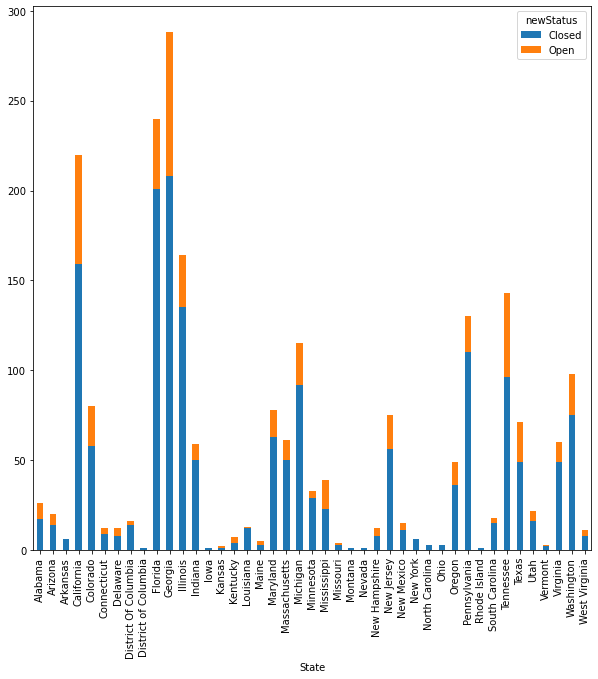

In [29]:
Status_complaints.plot.bar(figsize=(10,10),stacked=True)

# Which state has the maximum complaints

In [27]:
df.groupby(['State']).size().sort_values(ascending=False)[:5]

State
Georgia       288
Florida       240
California    220
Illinois      164
Tennessee     143
dtype: int64

# insights-maximum complaints are for state of georgia 

# Which state has the highest percentage of unresolved complaints

In [31]:
print(df['newStatus'].value_counts())

Closed    1707
Open       517
Name: newStatus, dtype: int64


newStatus             Closed  Open  Unresolved_complaints_pr
State                                                       
Georgia                208.0  80.0                 15.473888
California             159.0  61.0                 11.798839
Tennessee               96.0  47.0                  9.090909
Florida                201.0  39.0                  7.543520
Illinois               135.0  29.0                  5.609284
Washington              75.0  23.0                  4.448743
Michigan                92.0  23.0                  4.448743
Colorado                58.0  22.0                  4.255319
Texas                   49.0  22.0                  4.255319
Pennsylvania           110.0  20.0                  3.868472
New Jersey              56.0  19.0                  3.675048
Mississippi             23.0  16.0                  3.094778
Maryland                63.0  15.0                  2.901354
Oregon                  36.0  13.0                  2.514507
Virginia                

<AxesSubplot:xlabel='State'>

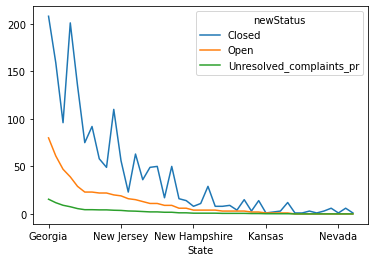

In [32]:
unresolved_data= df.groupby(['State','newStatus']).size().unstack().fillna(0).sort_values(by='Open',ascending=False)
unresolved_data['Unresolved_complaints_pr']=unresolved_data['Open']/unresolved_data['Open'].sum()*100
print(unresolved_data)
unresolved_data.plot()

# Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls

In [35]:
resolved_data=df.groupby(['Received Via','newStatus']).size().unstack().fillna(0)
resolved_data['resloved']=resolved_data['Closed']/resolved_data['Closed'].sum()*100
resolved_data['resloved']

Received Via
Customer Care Call    50.615114
Internet              49.384886
Name: resloved, dtype: float64

<AxesSubplot:xlabel='Received Via'>

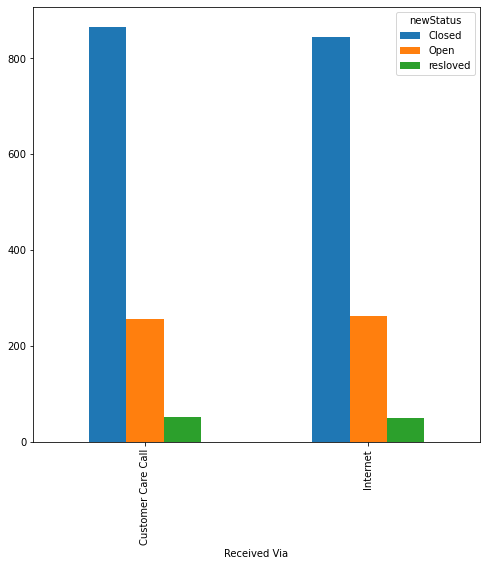

In [36]:
resolved_data.plot(kind='bar',figsize=(8,8))

# insights - `from above graph we can see there are total 50.61% complaints resolved for customer care call and 49.39% for received via internet